In [11]:
# imports needed library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score,KFold,LeaveOneOut
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,make_scorer,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [12]:
#path files
excel_file_path = 'C:/Users/mustafa/Desktop/final assignment/data.csv'


In [13]:
#data extraction
df = pd.read_csv(excel_file_path)
# axis 1 means drop the column
X=df.drop('stress_level',axis=1)
Y=df['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)


[ 809.53591037  929.25899438  525.79930866  835.11908998  679.02608791
  137.1044315   837.24291986  370.52587271  634.53577045  382.86242803
  779.94354898  793.68205313  725.15931178  479.75472195  687.87589189
  848.88559194  468.36030508  624.54205713  767.14971854 1040.14660017]


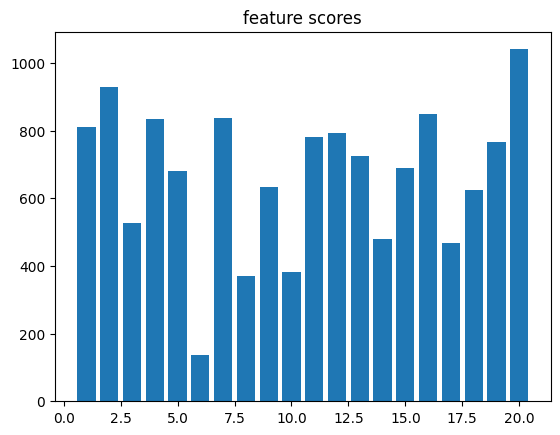

In [14]:
#feature selection
fs=SelectKBest(score_func=f_regression, k=5)
fs.fit(X_train,y_train)
X_train_fs=fs.transform(X_train)
X_test_fs=fs.transform(X_test)
print(fs.scores_)

selected_features_mask=fs.get_support() 

selected_feature_names = X.columns[selected_features_mask]


plt.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)

plt.title('feature scores')
plt.show()





<Figure size 800x800 with 0 Axes>

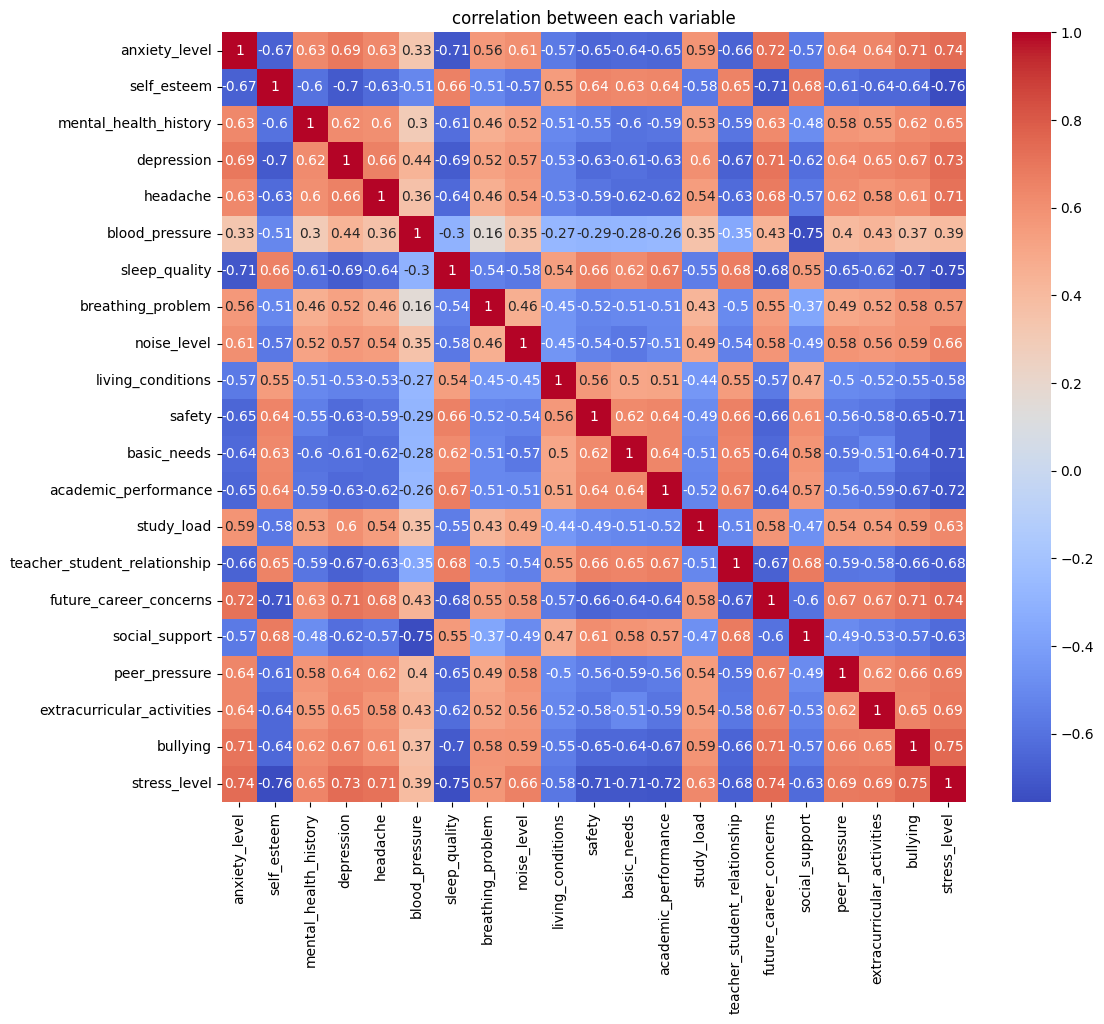

In [15]:

correl = df.corr('pearson')
plt.figure(figsize = (8,8))
plt.figure(figsize=(12, 10))
sns.heatmap(correl, cmap='coolwarm', annot=True)
plt.title('correlation between each variable')
plt.show()

In [16]:
#multi variable linear regression
linear_regr_model=LinearRegression(n_jobs=-1)

linear_regr_model.fit(X_train_fs,y_train)

y_predict=linear_regr_model.predict(X_test_fs)
r2_score_linear=r2_score(y_pred=y_predict,y_true=y_test)
MSE=mean_squared_error(y_pred=y_predict,y_true=y_test)

# Print the results
print("Linear regression Mean Squared Error:",round( MSE,ndigits=10))
print("Linear Regression R2_score:", round(r2_score_linear,ndigits=10))



Linear regression Mean Squared Error: 0.1443897462
Linear Regression R2_score: 0.7863029401


In [17]:
# fig, axes = plt.subplots(nrows=1, ncols=X_test_fs.shape[1], figsize=(15, 5))

# # Plot residuals for each feature
# for i in range(X_test_fs.shape[1]):
#     axes[i].scatter(X_test_fs[:, i], y_test - y_predict, color='red', label='Residuals')
#     axes[i].axhline(y=0, color='blue', linestyle='--', label='Zero Residuals')

#     # Customize plot
#     axes[i].set_title(f'Residuals for Feature {i + 1}')
#     axes[i].set_xlabel(f'Feature {i + 1}')
#     axes[i].set_ylabel('Residuals')
#     axes[i].legend()
#     axes[i].grid(True)

# plt.tight_layout()
# plt.show()

In [18]:
#Standardize scaler important for SVR and MLP
scaler_X = StandardScaler()
scaler_X.fit(X_train_fs)
X_train_fs_scaled = scaler_X.transform(X_train_fs)
X_test_fs_scaled = scaler_X.transform(X_test_fs)




In [19]:

# Initialize the Support Vector Regression model
svr_model = SVR(kernel='linear')  

svr_model.fit(X_train_fs_scaled, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test_fs_scaled)

# Evaluate the performance of the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the results
print("SVR Mean Squared Error:", mse_svr)
print("SVR R2_score:",r2_svr)


SVR Mean Squared Error: 0.14328153957518605
SVR R2_score: 0.787943087757196


In [20]:
#neural network model for regression
mlp_model = MLPRegressor(hidden_layer_sizes=(50), 
random_state=42,               
activation='relu'
) 
# 
# Fit the model using the training data
mlp_model.fit(X_train_fs_scaled, y_train)


y_pred_mlp = mlp_model.predict(X_test_fs_scaled)
mse_mlp_test = mean_squared_error(y_true=y_test, y_pred=y_pred_mlp)

print("MSE: ",mse_mlp_test)
print("R2_score",r2_score(y_pred=y_pred_mlp,y_true=y_test))






# 0.03853567995846441
# 0.046164155527085166



MSE:  0.12992456263611882
R2_score 0.8077114354103188
